In [1]:
import zipfile
import os


In [2]:
zip_file_path = 'Dataset Brain Tumor.zip'  # Replace with your file's name
extract_dir = 'Dataset Brain Tumor'  # Replace with the desired extraction directory


In [3]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [4]:
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['Dataset Brain Tumor', 'vi.py']


In [5]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

# Set paths
train_dir = 'Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = 'Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

2024-10-07 04:43:50.622171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 04:43:50.851023: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 04:43:50.857092: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/lib64:/opt/pbs/lib:
202

In [6]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [7]:
# Define CNN model
def create_cnn_model_with_sigmoid_fc(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer with Sigmoid Activation
    model.add(layers.Dense(128, activation='sigmoid'))

    # Output Layer with Softmax Activation
    model.add(layers.Dense(4, activation='softmax'))

    return model


In [8]:
# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model_sigmoid_fc = create_cnn_model_with_sigmoid_fc(input_shape)

# Compile the model
model_sigmoid_fc.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Model summary
model_sigmoid_fc.summary()

# Train the model
history = model_sigmoid_fc.fit(
    train_generator,
    epochs=50,  # Adjust based on your needs
    validation_data=test_generator
)

2024-10-07 04:44:18.943416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/lib64:/opt/pbs/lib:
2024-10-07 04:44:18.944148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/lib64:/opt/pbs/lib:
2024-10-07 04:44:18.944739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/sqlite-autoconf-3420000/build/lib:/usr/local/cuda-12.0/l

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 236, 236, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 118, 118, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 114, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 57, 57, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

179/179 [==============================] - 137s 766ms/step - loss: 0.2060 - accuracy: 0.9250 - val_loss: 0.2126 - val_accuracy: 0.9159
Epoch 45/50
179/179 [==============================] - 138s 770ms/step - loss: 0.1976 - accuracy: 0.9261 - val_loss: 0.1941 - val_accuracy: 0.9277
Epoch 46/50
179/179 [==============================] - 137s 766ms/step - loss: 0.2037 - accuracy: 0.9259 - val_loss: 0.1968 - val_accuracy: 0.9152
Epoch 47/50
179/179 [==============================] - 136s 759ms/step - loss: 0.1907 - accuracy: 0.9292 - val_loss: 0.2364 - val_accuracy: 0.9026
Epoch 48/50
179/179 [==============================] - 131s 732ms/step - loss: 0.1833 - accuracy: 0.9322 - val_loss: 0.2354 - val_accuracy: 0.9081
Epoch 49/50
179/179 [==============================] - 132s 737ms/step - loss: 0.1883 - accuracy: 0.9304 - val_loss: 0.2092 - val_accuracy: 0.9089
Epoch 50/50
179/179 [==============================] - 137s 763ms/step - loss: 0.1729 - accuracy: 0.9369 - val_loss: 0.2230 - val_

In [9]:
# Evaluate the model
y_true = test_generator.classes
y_pred = np.argmax(model_sigmoid_fc.predict(test_generator), axis=1)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)


40/40 [==============================] - 6s 138ms/step
              precision    recall  f1-score   support

      glioma       0.96      0.90      0.93       262
  meningioma       0.92      0.75      0.83       306
     notumor       0.88      1.00      0.94       405
   pituitary       0.94      0.99      0.96       300

    accuracy                           0.92      1273
   macro avg       0.92      0.91      0.91      1273
weighted avg       0.92      0.92      0.92      1273



In [10]:
# Calculate AUC score
y_true_bin = np.eye(len(test_generator.class_indices))[y_true]  # One-hot encode true labels
predictions = model_sigmoid_fc.predict(test_generator)
auc_scores = {}

for i, class_name in enumerate(test_generator.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    auc_score = auc(fpr, tpr)
    auc_scores[class_name] = auc_score

# Print AUC scores
print("\nClass\tAUC Score")
for class_name, auc_score in auc_scores.items():
    print(f"{class_name}\t{auc_score}")

40/40 [==============================] - 6s 134ms/step

Class	AUC Score
glioma	0.9938463164729956
meningioma	0.9739880095437002
notumor	0.997889287136599
pituitary	0.9989037341555327


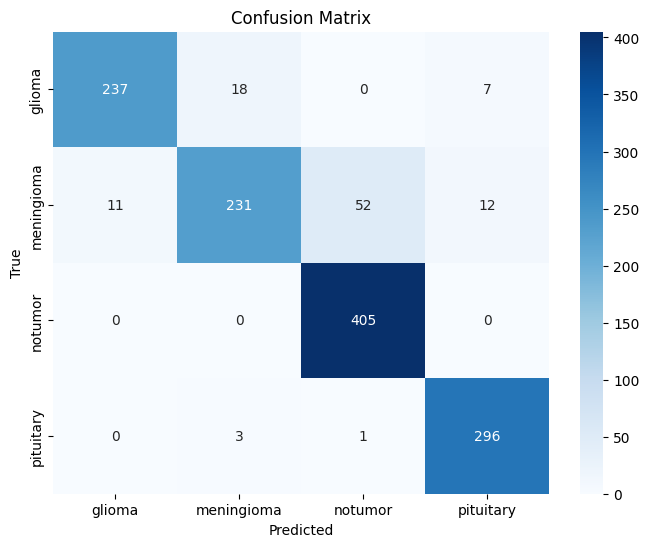

In [11]:
# Confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


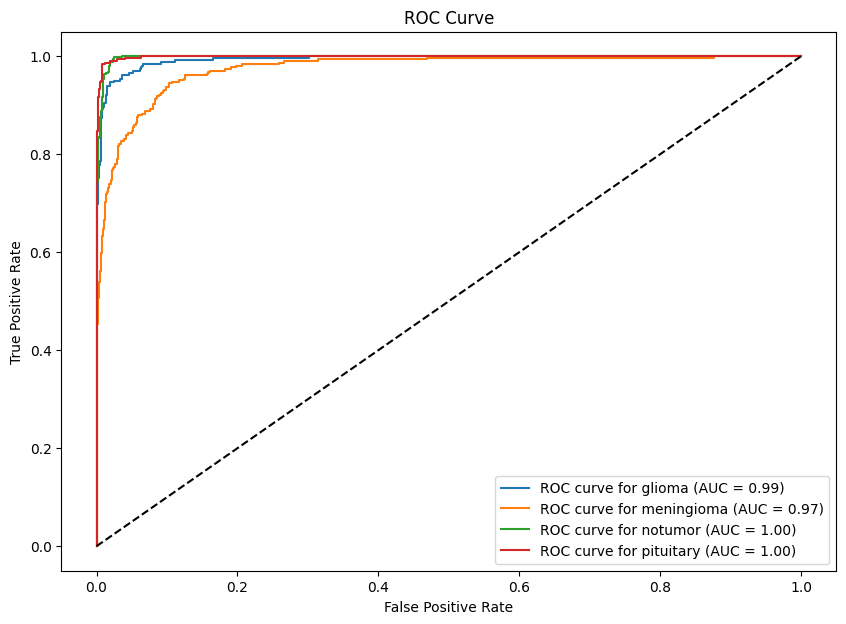

In [12]:
# ROC Curve
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(test_generator.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for {class_name} (AUC = {auc_scores[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

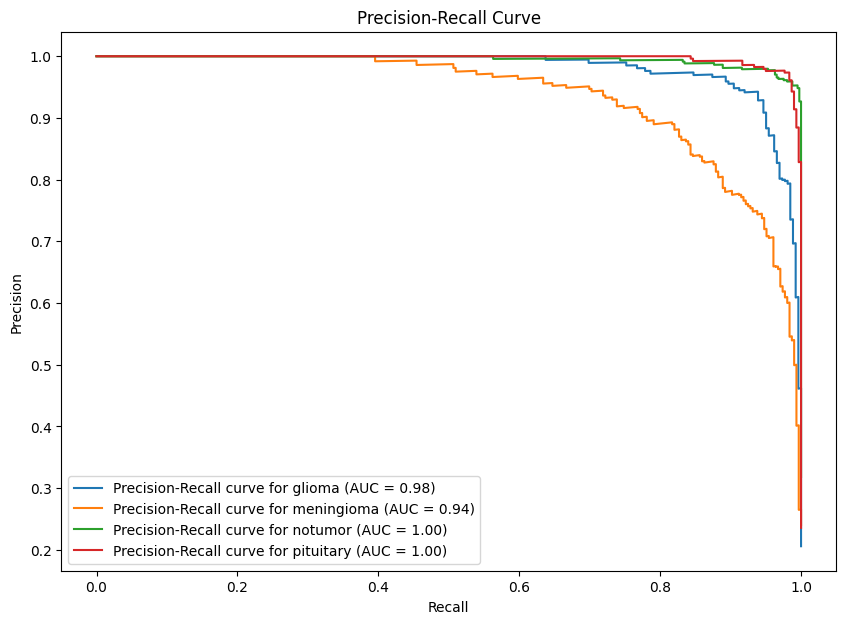

In [13]:
# Precision-Recall Curve
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(test_generator.class_indices.keys()):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], predictions[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve for {class_name} (AUC = {average_precision_score(y_true_bin[:, i], predictions[:, i]):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

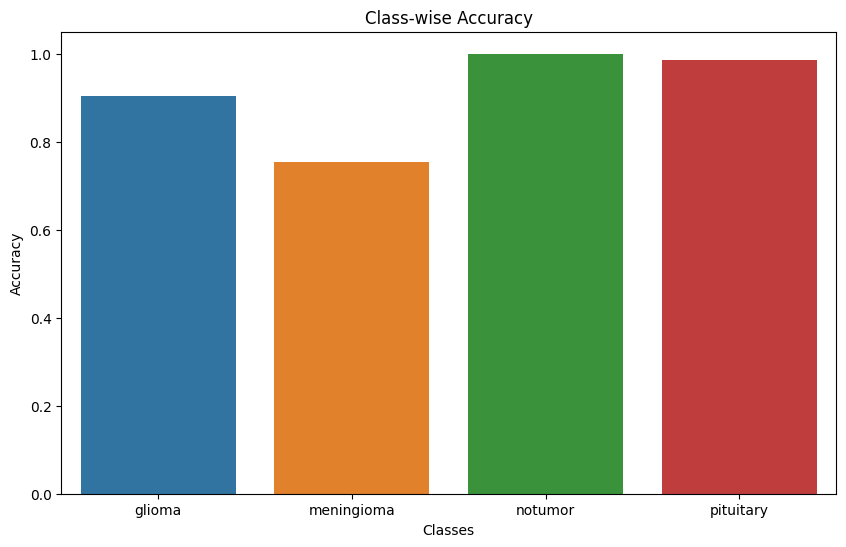

In [14]:
# Class-wise accuracy bar plot
class_accuracy = confusion_mtx.diagonal() / confusion_mtx.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_generator.class_indices.keys()), y=class_accuracy)
plt.title('Class-wise Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classes')
plt.show()


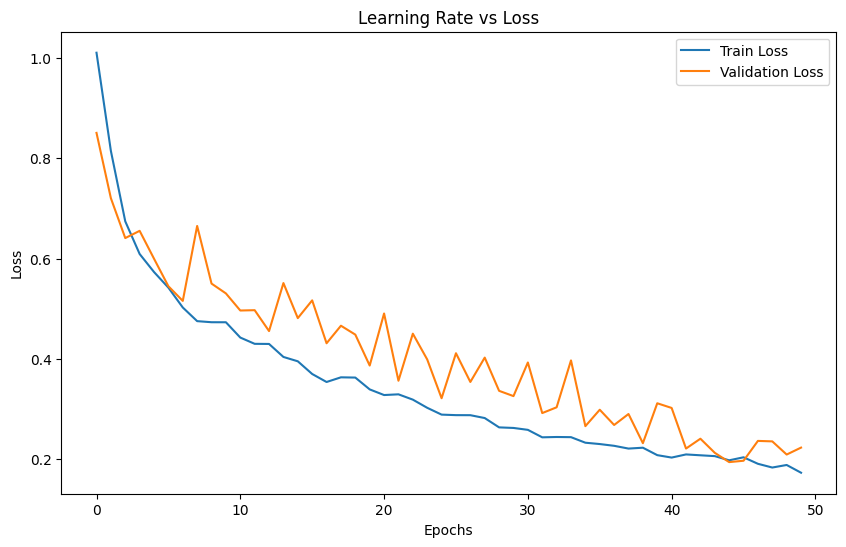

In [15]:
# Learning Rate vs Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Rate vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

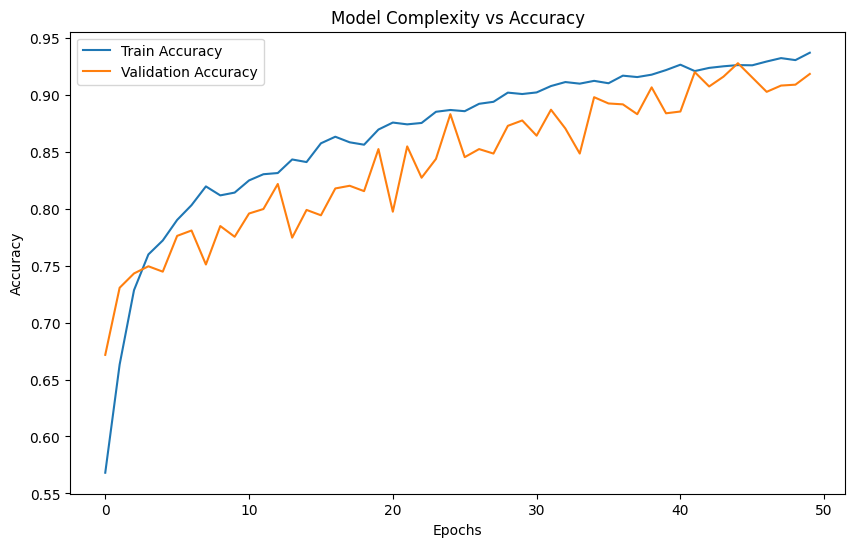

In [16]:
# Model Complexity vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Complexity vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()